__Applied Complex Analysis (2021)__

# Lecture 19: Classical orthogonal polynomials


We will also investigate the properties of _classical_ OPs.
A good reference is  [Digital Library of Mathematical Functions, Chapter 18](http://dlmf.nist.gov/18).

This lecture we discuss
1. Hermite, Laguerre, and Jacobi polynomials
2. Legendre, Chebyshev, and ultraspherical polynomials
3. Explicit construction for Chebyshev polynomials


## Definition of classical orthogonal polynomials

Classical orthogonal polynomials are orthogonal with respect to the following three weights:


| Name        |  $(a,b)$ |  $w(x)$      | Notation   |  $k_n$ |
|:-------------|:------------- |:----------------------|:-----|:-----|
| Hermite     |$(-\infty,\infty)$ | $\E^{-x^2}$             | $H_n(x)$ | $2^n$ |
| Laguerre    | $(0,\infty)$ | $x^\alpha \E^{-x}$      |   $L_n^{(\alpha)}(x)$ | [Table 18.3.1](http://dlmf.nist.gov/18.3) |
| Jacobi      | $(-1,1)$ | $(1-x)^{\alpha} (1+x)^\beta$      |    $P_n^{(\alpha,\beta)}(x)$ | [Table 18.3.1](http://dlmf.nist.gov/18.3) |


Note out of convention the parameters for Jacobi polynomials are right-to-left order.

We can actually construct these polynomials in Julia, first consider Hermite:

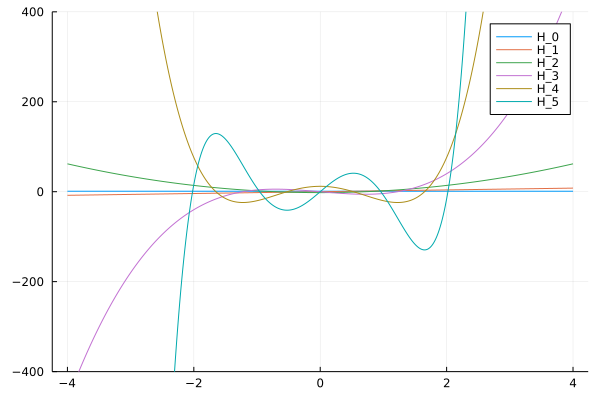

In [1]:
using ApproxFun, Plots, LinearAlgebra, ComplexPhasePortrait
H₀ = Fun(Hermite(), [1])
H₁ = Fun(Hermite(), [0,1])
H₂ = Fun(Hermite(), [0,0,1])
H₃ = Fun(Hermite(), [0,0,0,1])
H₄ = Fun(Hermite(), [0,0,0,0,1])
H₅ = Fun(Hermite(), [0,0,0,0,0,1])

xx = -4:0.01:4
plot(xx, H₀.(xx); label="H_0", ylims=(-400,400))
plot!(xx, H₁.(xx); label="H_1", ylims=(-400,400))
plot!(xx, H₂.(xx); label="H_2", ylims=(-400,400))
plot!(xx, H₃.(xx); label="H_3", ylims=(-400,400))
plot!(xx, H₄.(xx); label="H_4", ylims=(-400,400))
plot!(xx, H₅.(xx); label="H_5")

We verify their orthogonality:

In [2]:
w = Fun(GaussWeight(), [1.0])

@show sum(H₂*H₅*w)  # means integrate
@show sum(H₅*H₅*w);

sum(H₂ * H₅ * w) = 0.0
sum(H₅ * H₅ * w) = 6806.222787477181


Now Jacobi:

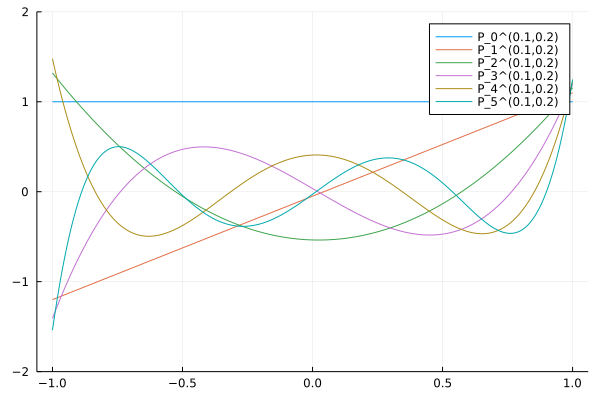

In [3]:
α,β = 0.1,0.2
P₀ = Fun(Jacobi(β,α), [1])
P₁ = Fun(Jacobi(β,α), [0,1])
P₂ = Fun(Jacobi(β,α), [0,0,1])
P₃ = Fun(Jacobi(β,α), [0,0,0,1])
P₄ = Fun(Jacobi(β,α), [0,0,0,0,1])
P₅ = Fun(Jacobi(β,α), [0,0,0,0,0,1])

xx = -1:0.01:1
plot( xx, P₀.(xx); label="P_0^($α,$β)", ylims=(-2,2))
plot!(xx, P₁.(xx); label="P_1^($α,$β)")
plot!(xx, P₂.(xx); label="P_2^($α,$β)")
plot!(xx, P₃.(xx); label="P_3^($α,$β)")
plot!(xx, P₄.(xx); label="P_4^($α,$β)")
plot!(xx, P₅.(xx); label="P_5^($α,$β)")

In [4]:
w = Fun(JacobiWeight(β,α), [1.0])
@show sum(P₂*P₅*w)  # means integrate
@show sum(P₅*P₅*w);

sum(P₂ * P₅ * w) = 1.0328132900334873e-17
sum(P₅ * P₅ * w) = 0.21713358248393153


## Legendre, Chebyshev, and ultraspherical polynomials

There are special families of Jacobi weights with their own name.

| Name        | Jacobi parameters  |  $w(x)$      | Notation   |  $k_n$ |
|:-------------|:------------- |:----------------------|:-----|:------|
| Jacobi      | $\alpha,\beta$ | $(1-x)^{\alpha} (1+x)^\beta$      |    $P_n^{(\alpha,\beta)}(x)$ | [Table 18.3.1](http://dlmf.nist.gov/18.3) |
| Legendre      | $0,0$ | $1$      |    $P_n(x)$ | $2^n(1/2)_n/n!$ |
| Chebyshev (1st)      | $-{1 \over 2},-{1 \over 2}$ | $1 \over \sqrt{1-x^2}$ | $T_n(x)$ | $1 (n=0), 2^{n-1} (n \neq 0)$ |
| Chebyshev (2nd)      | ${1 \over 2},{1 \over 2}$ | $\sqrt{1-x^2}$      |    $U_n(x)$ | $2^n$
| Ultraspherical      | $\lambda-{1 \over 2},\lambda-{1 \over 2}$ | $(1-x^2)^{\lambda - 1/2}, \lambda \neq 0$      |    $C_n^{(\lambda)}(x)$ | $2^n(\lambda)_n/n!$ |

Note that other than Legendre, these polynomials have a different normalization than $P_n^{(\alpha,\beta)}$:

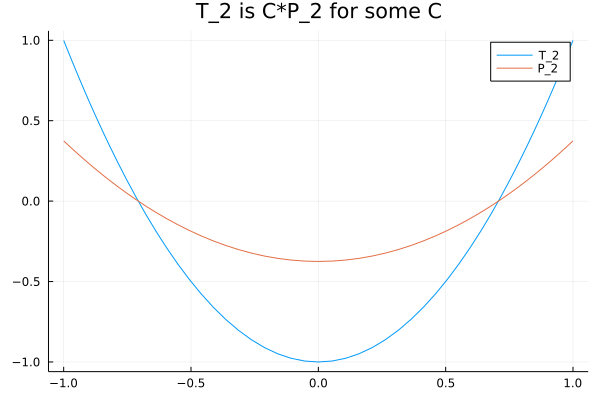

In [5]:
T₂ = Fun(Chebyshev(), [0.0,0,1])
P₂ = Fun(Jacobi(-1/2,-1/2), [0.0,0,1])
plot(T₂; label="T_2", title="T_2 is C*P_2 for some C")
plot!(P₂; label="P_2")

But because they are orthogonal w.r.t. the same weight, they must be a constant multiple of each-other,
as discussed last lecture.

### Explicit construction of Chebyshev polynomials (first kind and second kind)

Chebyshev polynomials are pretty much the only OPs with _simple_ closed form expressions.

**Proposition (Chebyshev first kind formula)**
$$T_n(x) = \cos n \acos x$$
or in other words,
$$
T_n(\cos \theta) = \cos n \theta
$$

**Proof** We first show that they are orthogonal w.r.t. $1/\sqrt{1-x^2}$. Too easy: do $x = \cos \theta$, $\dx = -\sin \theta$ to get (for $n \neq m$)
$$
\begin{align*}
    \int_{-1}^1 {\cos n \acos x \cos m \acos x \dx \over \sqrt{1-x^2}} &= -\int_\pi^0  \cos n \theta \cos m \theta \D \theta \ccr
    =  \int_0^\pi  {\E^{\I (-n-m)\theta} + \E^{\I (n-m)\theta} + \E^{\I (m-n)\theta} + \E^{\I (n+m)\theta}    \over 4} \D \theta =0
\end{align*}
$$

We then need to show it has the right highest order term $k_n$. Note that $k_0 = k_1 = 1$.  Using $z = \E^{\I \theta}$ we see that $\cos n \theta$ has a simple recurrence for $n=2,3,\ldots$:
$$
\cos n \theta = {z^n + z^{-n} \over 2} = 2 {z + z^{-1} \over 2} {z^{n-1} + z^{1-n} \over 2}- {z^{n-2} + z^{2-n} \over 2} =
2 \cos \theta \cos (n-1)\theta - \cos(n-2)\theta
$$
thus
$$
\cos n \acos x = 2 x \cos(n-1) \acos x - \cos(n-2) \acos x
$$
It follows that
$$
k_n = 2  k_{n-1} = 2^{n-1} k_1 = 2^{n-1}
$$
By uniqueness we have $T_n(x) = \cos n \acos x$.

■


**Proposition (Chebyshev second kind formula)**
$$U_n(x) = {\sin (n+1) \acos x \over \sin \acos x}$$
or in other words,
$$
U_n(\cos \theta) = {\sin (n+1) \theta \over \sin \theta}
$$



*Example* For the case of Chebyshev polynomials, we have
$$
J = \begin{pmatrix}
0 & 1 \cr
\half & 0 & \half \cr
& \half & 0 & \half \cr
&& \half & 0 & \ddots \cr
&&&\ddots & \ddots
\end{pmatrix}
$$
Therefore, the Chebyshev coefficients of $x f(x)$ are given by
$$
J^\top \vc f = \begin{pmatrix}
0 & \half \cr
1 & 0 & \half \cr
& \half & 0 & \half \cr
&& \half & 0 & \ddots \cr
&&&\ddots & \ddots
\end{pmatrix} \begin{pmatrix} f_0\\ f_1\\f_2\\f_3\\\vdots\end{pmatrix}
$$

### Demonstration
In the case where $f$ is a degree $n-1$  polynomial, we can represent $J^\top$ as an $n+1 \times n$ matrix (this makes sense as $x f(x)$ is one more degree than $f$):

In [6]:
f = Fun(exp, Chebyshev())
n = ncoefficients(f) # number of coefficients
@show n
J = zeros(n,n+1)
J[1,2] = 1
for k=2:n
    J[k,k-1] = J[k,k+1] = 1/2
end
J'

n = 14


15×14 adjoint(::Matrix{Float64}) with eltype Float64:
 0.0  0.5  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0
 1.0  0.0  0.5  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0
 0.0  0.5  0.0  0.5  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0
 0.0  0.0  0.5  0.0  0.5  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0
 0.0  0.0  0.0  0.5  0.0  0.5  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0
 0.0  0.0  0.0  0.0  0.5  0.0  0.5  0.0  0.0  0.0  0.0  0.0  0.0  0.0
 0.0  0.0  0.0  0.0  0.0  0.5  0.0  0.5  0.0  0.0  0.0  0.0  0.0  0.0
 0.0  0.0  0.0  0.0  0.0  0.0  0.5  0.0  0.5  0.0  0.0  0.0  0.0  0.0
 0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.5  0.0  0.5  0.0  0.0  0.0  0.0
 0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.5  0.0  0.5  0.0  0.0  0.0
 0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.5  0.0  0.5  0.0  0.0
 0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.5  0.0  0.5  0.0
 0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.5  0.0  0.5
 0.0  0.0  0.0  0.0  0.0  0.0  0.0  

In [7]:
cfs = J'*f.coefficients # coefficients of x*f
xf = Fun(Chebyshev(), cfs)

xf(0.1) - 0.1*f(0.1)

-6.938893903907228e-17

We can construct $T_0(x),\ldots,T_{n-1}(x)$ via
$$
\begin{align*}
    T_0(x) &= 1\\
    T_1(x) &= x T_0(x) \\
    T_{k+1}(x) &= 2x  T_k(x) -  T_{k-1}(x), \qquad 1 \leq k \leq n-2
\end{align*}
$$
Believe it or not, this is much faster than using $\cos k \acos x$:

In [8]:
function recurrence_Chebyshev(n,x)
    T = zeros(n)
    T[1] = 1.0
    T[2] = x*T[1]
    for k = 2:n-1
        T[k+1] = 2x*T[k] - T[k-1]
    end
    T
end

trig_Chebyshev(n,x) = [cos(k*acos(x)) for k=0:n-1]

n = 10
recurrence_Chebyshev(n, 0.1) - trig_Chebyshev(n,0.1) |>norm

1.1102230246251565e-16

In [9]:
n = 10000
@time recurrence_Chebyshev(n, 0.1)
@time trig_Chebyshev(n,0.1);

  0.000033 seconds (2 allocations: 78.172 KiB)
  0.000257 seconds (2 allocations: 78.172 KiB)


We can also demonstrate Clenshaw's algorithm for evaluating polynomials. To evaluate an expansion in Chebyshev polynomials,
$$
\sum_{k = 0}^{n-1}f_kT_k(x)
$$
 we want to solve the system
$$
\underbrace{\begin{pmatrix}
1 & -x & \half \\
& 1 & -x & \half  \\
& & \half & -x & \ddots  \\
& &     & \half & \ddots & \half \\
&&&&\ddots & -x \\
&&&&& \half
\end{pmatrix}}_{L_x^\top} \begin{pmatrix} \gamma_0 \\\vdots\\ \gamma_{n-1} \end{pmatrix}
$$
via
$$
\begin{align*}
\gamma_{n-1} &= 2f_{n-1} \\
\gamma_{n-2} &= 2f_{n-2} + 2x \gamma_{n-1} \\
\gamma_{n-3} &= 2 f_{n-3} + 2x \gamma_{n-2} - \gamma_{n-1} \\
& \vdots \\
\gamma_1 &= f_1 + x \gamma_2 - \half \gamma_3 \\
\gamma_0 &= f_0 + x \gamma_1 - \half \gamma_2
\end{align*}
$$
then $f(x) = \gamma_0$.

In [10]:
function clenshaw_Chebyshev(f,x)
    n = length(f)
    γ = zeros(n)
    γ[n] = 2f[n]
    γ[n-1] = 2f[n-1] +2x*f[n]
    for k = n-2:-1:1
        γ[k] = 2f[k] + 2x*γ[k+1] - γ[k+2]
    end
    γ[2] = f[2] + x*γ[3] - γ[4]/2
    γ[1] = f[1] + x*γ[2] - γ[3]/2
    γ[1]
end

f = Fun(exp, Chebyshev())
clenshaw_Chebyshev(f.coefficients, 0.1) - exp(0.1)

-1.3322676295501878e-15

With some high performance computing tweaks, this can be made more accurate.
This is the algorithm used for evaluating functions in ApproxFun:

In [11]:
f(0.1) - exp(0.1)

0.0

## Approximation with Chebyshev polynomials

Previously, we used the formula, derived via trigonometric manipulations,
$$
T_1(x) = x T_0(x), \qquad
T_{n+1}(x) = 2x T_n(x) - T_{n-1}(x)
$$
Rearranging, this becomes
$$
 x T_0(x) = T_1(x), \qquad
x T_n(x)  =  {T_{n-1}(x) \over 2} + {T_{n+1}(x) \over 2}
$$
This tells us that we have the three-term recurrence with $a_n = 0$, $b_0 = 1$, $c_n = b_n = {1 \over 2}$ for $n > 0$.

This can be extended to function approximation. Provided the sum converges absolutely and uniformly in $x$, we can write
$$
f(x) = \sum_{k=0}^\infty f_k T_k(x).
$$
In practice, we can approximate smooth functions by a finite truncation:
$$
f(x) \approx \sum_{k=0}^{n-1} f_k T_k(x)
$$

Here we see that $\E^x$ can be approximated by a Chebyshev approximation using 14 coefficients and is accurate to 16 digits:

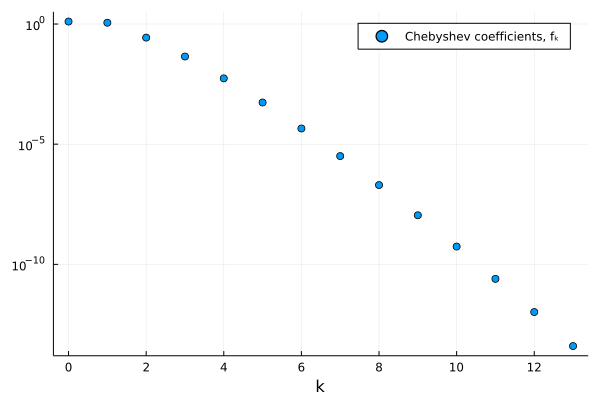

In [12]:
f = Fun(x -> exp(x), Chebyshev())
scatter(0:ncoefficients(f)-1,abs.(f.coefficients);yscale=:log10,label="Chebyshev coefficients, fₖ",xlabel="k")

In [13]:
@show ncoefficients(f)
@show f(0.1) # equivalent to f.coefficients'*[cos(k*acos(x)) for k=0:ncoefficients(f)-1]
@show exp(0.1);

ncoefficients(f) = 14
f(0.1) = 1.1051709180756477
exp(0.1) = 1.1051709180756477


The accuracy of this approximation is typically dictated by the smoothness of $f$: the more times we can differentiate, the faster it converges.
For analytic functions, it's dictated by the domain of analyticity, just like Laurent/Fourier series. In the case above, $\E^x$ is entire hence we get faster than exponential convergence.


Chebyshev expansions work even when Taylor series do not. For example, the following function has poles at $\pm {\I \over 5}$, which means the radius of convergence for the Taylor series is $|x| < {1 \over 5}$,
but Chebyshev polynomials continue to work on $[-1,1]$:

ncoefficients(f) = 189


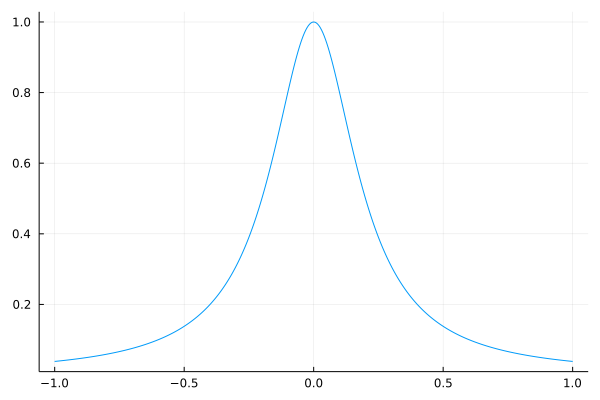

In [14]:
f = Fun( x -> 1/(25x^2 + 1), Chebyshev())
@show ncoefficients(f)
plot(f;label=false)

This can be explained for Chebyshev expansion by noting that it is the cosine expansion / Fourier expansion of an even function:
$$
f(x) = \sum_{k=0}^\infty f_k T_k(x) \Leftrightarrow f(\cos \theta) = \sum_{k=0}^\infty f_k \cos k \theta
$$

### Exponential decay of Fourier coefficients of periodic, analytic functions revisited

Before we get to the decay of Chebyshev coefficients, we revisit the proof of the exponential decay of _Fourier_ coefficients in Lecture 6. Suppose $f(\theta)$ is $2\pi$-periodic and analytic on $\theta \in [-\pi, \pi)$, then
$$
    f(\theta) = \sum_{k=-\infty}^\infty \hat f_k \E^{i k \theta}
$$
where
$$
\hat f_k = {1\over 2 \pi} \int_{-\pi}^\pi f(\theta) \E^{-i k \theta} d \theta.
$$
Recall in Lecture 6 we set $z = \E^{\I \theta}$ in which case the Fourier series of $f$ becomes a Laurent series of a function $g(z)$:
$$
f(\theta) = \sum_{k=-\infty}^\infty \hat f_k \E^{i k \theta} = \sum_{k=-\infty}^\infty g_k z^k =: g(z),
$$
with $g_k = \hat f_k$. We proved that if $g(z)$ is analytic on the closed annulus $A_{r,R} = \lbrace z : r \leq \vert z \vert \leq R \rbrace$, $0 < r <1$, $R > 1$ then for all $k \in \mathbb{Z}$, $$|g_k | \leq M\min\left\{{1 \over R^k} , {1 \over r^k}\right\}$$
where $M = \sup_{z \in  A_{r,R}} |g(z)|$. This result implies the exponential decay of the Fourier coefficients of $f$.

An annulus in the $z$-plane corresponds to a strip of width $2\pi$ in the (complex) $\theta$-plane under the transformation $z = \E^{\I \theta}$, $\Re \theta \in [-\pi, \pi)$:
$$
\begin{align*}
& z \in A_{r,R} = \lbrace z : r \leq \vert z \vert \leq R \rbrace \qquad \underbrace{\Longleftrightarrow}_{z = \E^{\I \theta}} \\
& \theta \in  S_{r,R} =   \lbrace \theta : -\pi \leq \Re  \theta < \pi,  -\log(R) \leq \Im \theta \leq \log(1/r) \rbrace.
\end{align*}
$$

Suppose $f(\theta)$ is real-valued on $[-\pi, \pi)$, then $\overline{f(\theta)} = f(\overline{\theta})$. Hence if the closest singularity to the real $\theta$-axis is at $\theta = \theta_x + \I \theta_y$, with $\theta_x \in [-\pi, \pi)$ and $\theta_y > 0$, then $f$ also has a singularity at  $\theta_x - \I \theta_y$. Thus $f$ is analytic in the strip
$$
S_{r,R} = \theta \in    \lbrace \theta : -\pi \leq \Re  \theta < \pi,  -\log(R) \leq \Im \theta \leq \log(1/r) \rbrace
$$
with
$$
{1 \over r} = R < \E^{\theta_y}
$$
and the Fourier coefficients are bounded by
$$
|f_k | = |g_k |  \leq M\min\left\{{1 \over R^k} , {1 \over r^k}\right\} = M r^{|k|} = M R^{-|k|}, \qquad k \in \mathbb{Z},
$$
where $M = \sup_{z \in  A_{r,R}} |g(z)| = \sup_{\theta \in  S_{r,R}} |f(\theta)|$. The larger the strip of analyticity, the larger we can make $R$ and the faster the Fourier coefficients of $f$ decay as $\vert k \vert \to \infty$ (hence the faster the truncated Fourier expansion $\sum_{k=-n}^{n}\hat f_k \E^{i k \theta}$ of $f$ converges to $f$ as $n \to \infty$).

_Example (see also Lecture 6)_ The function
$$
 f(\theta) = {1 \over 2 - \cos\theta},
$$
has poles at $\theta = \pm \I \log (2 + \sqrt{3})$; it is analytic in the strip $S_{r,R}$ with $R = 1/r < 2 + \sqrt{3}$ and the maximum of $\vert f(\theta) \vert$ on $S_{r,R}$ is
$$
M = {2 \over 4 - R^{-1} + R},
$$
 hence
$$
|f_k| =     |g_k| \leq {2 \over 4 - R -R^{-1}} R^{-\vert k \vert}, \qquad k \in \mathbb{Z},
$$
for all $R < 2 + \sqrt{3}$.

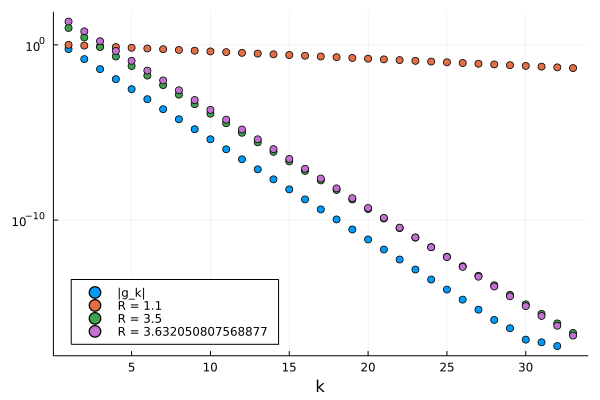

In [15]:
g =Fun(θ -> 1/(2-cos(θ)), Laurent(-π .. π))
g₊ = g.coefficients[1:2:end]
scatter(abs.(g₊); yscale=:log10, label="|g_k|", legend=:bottomleft,xlabel="k")
R = 1.1
scatter!(2/(4-R-inv(R))*R.^(-(0:length(g₊))), label = "R = $R")
R = 3.5
scatter!(2/(4-R-inv(R))*R.^(-(0:length(g₊))), label = "R = $R")
R = 2+sqrt(3)-0.1
scatter!(2/(4-R-inv(R))*R.^(-(0:length(g₊))), label = "R = $R")

### Exponential decay of Chebyshev coefficients of analytic functions

Suppose $f(x)$ is analytic on $[-1, 1]$, then
$$
\begin{align*}
f(x) & = \sum_{k = 0}^{\infty} f_k T_k(x) \\
     & =\sum_{k = 0}^{\infty} f_k \cos k\theta \qquad (x = \cos\theta) \\
     & = \sum_{k = 0}^{\infty} {f_k \over 2}\left( z^k + z^{-k}\right)  \qquad (z = \E^{\I \theta}) \\
     & =: \sum_{k = -\infty}^{\infty} g_k z^{k} =: g(z) \qquad (g_0 = f_0, g_{k} = g_{-k} = f_k/2, k\geq 0)
\end{align*}
$$
Now we can use the bound on the Laurent coefficients of $g(z)$ to bound the Chebyshev coefficients of $f(x)$. First we need to establish what is the image in the (complex) $x$-plane of an annulus in the $z$-plane under the transformation $2x = z + z^{-1}$, which is known as the Joukowsky map.

Let $\rho > 1$ and
$$
A_{1,\rho} =  \lbrace z : 1 \leq \vert z \vert \leq \rho \rbrace, \qquad  A_{\rho^{-1},1} =  \lbrace z : \rho^{-1} \leq \vert z \vert \leq 1 \rbrace.
$$
The Joukowsky transformation maps $A_{1,\rho}$ and $A_{\rho^{-1},1}$ to the following ellipse (known as a Bernstein ellipse) in the $x$-plane:
$$
E_{\rho} = \left\lbrace x : {(\Re x)^2 \over \alpha^2} + {(\Im x)^2 \over \beta^2} \leq 1, \alpha = {1 \over 2}\left( \rho + \rho^{-1} \right),   \beta = {1 \over 2}\left( \rho - \rho^{-1} \right) \right\rbrace.
$$
We conclude that if $f(x)$ is analytic on $E_{\rho}$ (or $g(z)$ is analytic on $A_{\rho^{-1},\rho}$) and $M = \sup_{x \in  E_{\rho}} |f(x)| = \sup_{z \in  A_{\rho^{-1},\rho}} |g(z)|$, then
$$
\vert f_k \vert = 2 \vert g_k \vert \leq 2M\rho^{-k}, \qquad k \geq 1.
$$
The larger the Bernstein ellipse on which $f(x)$ is analytic, the faster the decay of the Chebyshev coefficients as $k \to \infty$ (and hence the faster the convergence of the Chebyshev expansion of $f$).

A truncated Chebyshev expansion with $n$ terms of a function $f(x)$ that is analytic on $E_{\rho}$ converges at essentially the same exponential rate as the bound on the Chebyshev coefficients as $n \to \infty$:
$$
\begin{align*}
\left \vert f(x) -   \sum_{k = 0}^{n-1}f_kT_k(x) \right\vert & = \left \vert  \sum_{k = n}^{\infty}f_kT_k(x) \right\vert \leq \sum_{k = n}^{\infty}\vert f_k \vert \leq 2M \sum_{k = n}^{\infty} \rho^{-k}\\
& = 2M \frac{\rho^{-n}}{1 - \rho^{-1}}
\end{align*}
$$


_Example_  In the case of $f(x) = {1 \over 25 x^2 + 1}$, setting $2x = z + z^{-1}$, we find that
$$
f(x) = f\left( {z+z^{-1} \over 2 } \right) = g(z) = {4 z^2 \over 25 + 54 z^2 + 25 z^4}.
$$
In the complex $x$-plane, $f(x)$ has poles at $\pm \I/5$ and is analytic on $E_{\rho}$ with $\beta = (\rho - \rho^{-1})/2 < 1/5$, hence $\rho < { 1 + \sqrt{26} \over 5 }$. In the $z$-plane, $g(z)$ has poles at $\pm \I { 1 \pm \sqrt{26} \over 5 } \approx \pm 0.8198040\I,\pm1.2198\I$ and is analytic on the annulus $\rho^{-1} \leq \vert z \vert \leq \rho$.

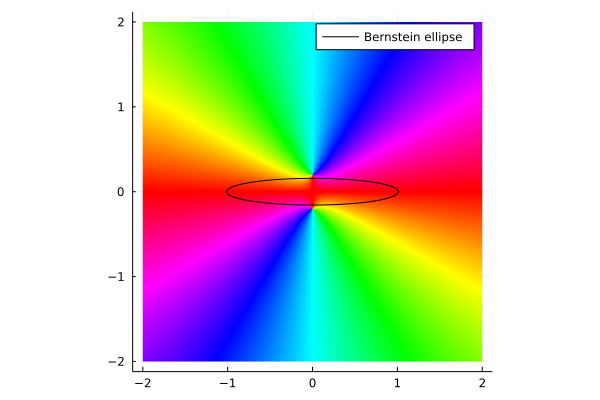

In [16]:
ρ = (1 + sqrt(26))/5-0.05;
α = (ρ + 1/ρ)/2
β = (ρ - 1/ρ)/2
θ = -π:0.01:π
f = x -> 1/(25x^2 + 1)
phaseplot(-2..2, -2..2, z -> f(z))
plot!(α*cos.(θ),β*sin.(θ);linecolor="black",label="Bernstein ellipse")

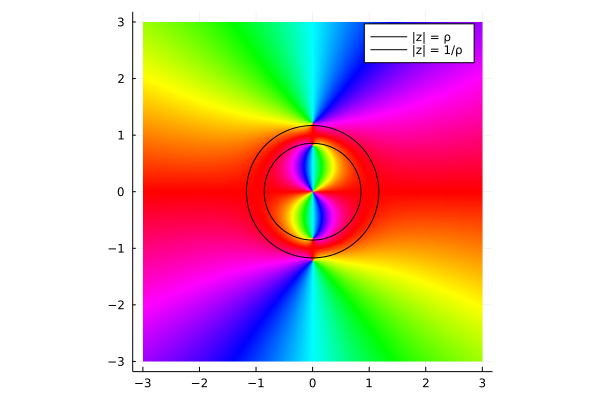

In [17]:
phaseplot(-3..3, -3..3, z -> f((z+1/z)/2))
plot!(ρ*cos.(θ),ρ*sin.(θ),linecolor="black",label="|z| = ρ")
plot!(cos.(θ)/ρ,sin.(θ)/ρ,linecolor="black",label="|z| = 1/ρ")

For $\beta = (\rho - \rho^{-1})/2 < 1/5$, we have
$$
M =  \sup_{x \in  E_{\rho}} |f(x)| = {1 \over 1 - 25 \beta^2}
$$
hence for $k \geq 1$,
$$
\vert f_k \vert \leq {2 \over   1 - 25 \beta^2} \rho^{-k}, \qquad 1 < \rho <  { 1 + \sqrt{26} \over 5 }.
$$
Therefore we predict a rate of decay of about $1.2198^{-k}$:

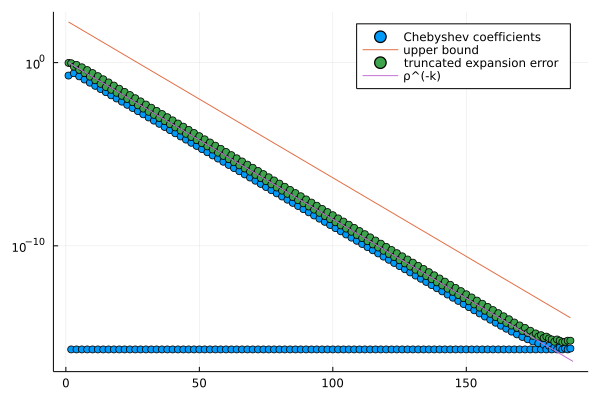

In [18]:
bound(β,k) = 2/(1-25*β^2)*(β + sqrt(β^2 + 1))^(-k)
f = Fun( x -> 1/(25x^2 + 1), Chebyshev())
scatter(abs.(f.coefficients) .+ eps(); yscale=:log10, label="Chebyshev coefficients")
plot!(1:ncoefficients(f), bound.(1/5-0.001,1:ncoefficients(f)); label="upper bound")
# Also calculate the error of truncated Chebyshev expansions with n terms for n = 1, 2, ...
xx = -1:0.001:1 # a fine grid on which to evaluate
Errv = [(maximum(abs.(f.(xx)-Fun(f,Chebyshev(),n).(xx)))) for n = 1:ncoefficients(f)]
scatter!(1:ncoefficients(f),Errv.+eps();label="truncated expansion error")
plot!( 1.2198.^(-(0:ncoefficients(f))); label="ρ^(-k)")